# Sprint ゲート付きリカレントニューラルネットワーク

## 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。


SimpleRNN
GRU
LSTM
ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。


Keras公式のサンプルコードを利用してください。


LSTMのサンプルコード


keras/imdb_lstm.py at master · keras-team/keras


ConvLSTM2Dのサンプルコード


keras/conv_lstm.py at master · keras-team/keras


このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。



In [1]:
'''
#Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
**Notes**
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
 
(＃IMDB感情分類タスクでLSTMモデルをトレーニングします。
データセットは実際には小さすぎてLSTMを活用できません
TF-IDF + LogRegなどのより単純ではるかに高速なメソッドと比較して。
**ノート**
-RNNには注意が必要です。バッチサイズの選択は重要です、
損失とオプティマイザの選択は重要です。
一部の構成は収束しません。
-トレーニング中のLSTM損失の減少パターンはかなり異なる可能性があります
CNN / MLP / etcで見たものから。)

'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/15
782/782 [==============================] - 146s 187ms/step - loss: 0.4411 - accuracy: 0.7866 - val_loss: 0.3691 - val_accuracy: 0.8354
Epoch 2/15
782/782 [==============================] - 151s 193ms/step - loss: 0.2564 - accuracy: 0.8978 - val_loss: 0.3715 - val_accuracy: 0.8384
Epoch 3/15
782/782 [==============================] - 149s 191ms/step - loss: 0.1668 - accuracy: 0.9373 - val_loss: 0.4282 - val_accuracy: 0.8314
Epoch 4/15
782/782 [==============================] - 173s 221ms/step - loss: 0.1098 - accuracy: 0.9605 - val_loss: 0.5753 - val_accuracy: 0.8239
Epoch 5/15
782/782 [==============================] - 160s 204ms/step - loss: 0.0730 - accuracy: 0.9731 - val_loss: 0.6689 - val_accuracy: 0.8186
Epoch 6/15
782/782 [==================

In [17]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


Epoch 1/10
10/10 [==============================] - 272s 27s/step - loss: 0.8410 - val_loss: 0.6928
Epoch 2/10
10/10 [==============================] - 269s 27s/step - loss: 0.8281 - val_loss: 0.6929
Epoch 3/10
10/10 [==============================] - 268s 27s/step - loss: 0.8172 - val_loss: 0.6931
Epoch 4/10
10/10 [==============================] - 274s 27s/step - loss: 0.8079 - val_loss: 0.6934
Epoch 5/10
10/10 [==============================] - 279s 28s/step - loss: 0.8000 - val_loss: 0.6939
Epoch 6/10
10/10 [==============================] - 266s 27s/step - loss: 0.7932 - val_loss: 0.6943
Epoch 7/10
10/10 [==============================] - 265s 27s/step - loss: 0.7871 - val_loss: 0.6948
Epoch 8/10
10/10 [==============================] - 268s 27s/step - loss: 0.7815 - val_loss: 0.6954
Epoch 9/10
10/10 [==============================] - 271s 27s/step - loss: 0.7763 - val_loss: 0.6959
Epoch 10/10
10/10 [==============================] - 275s 27s/step - loss: 0.7715 - val_loss: 0.6963

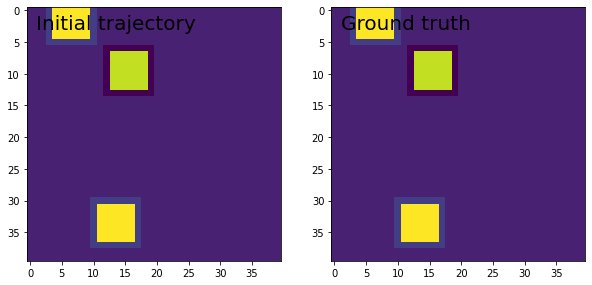

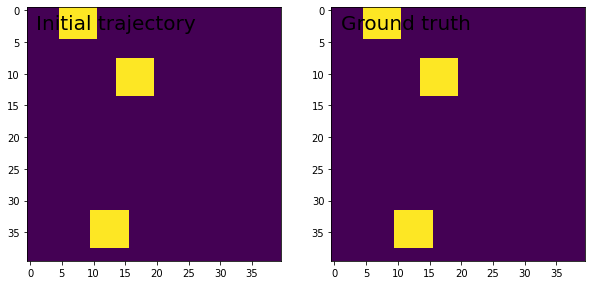

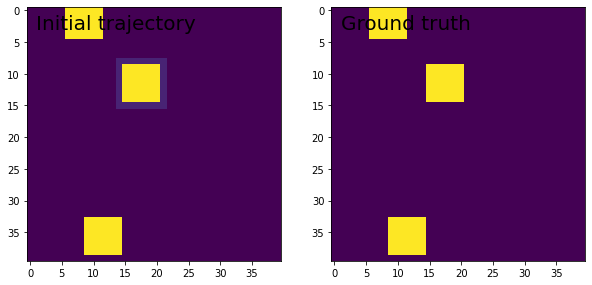

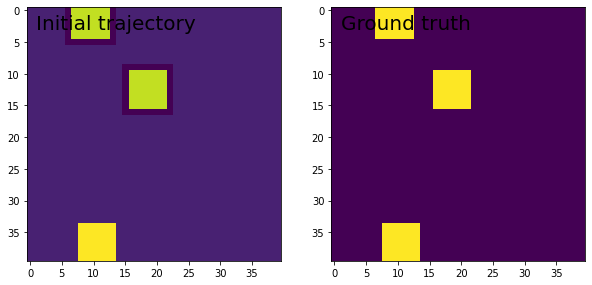

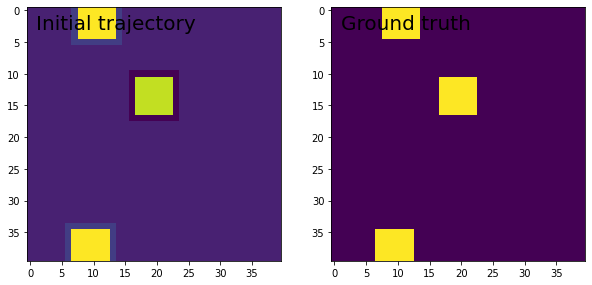

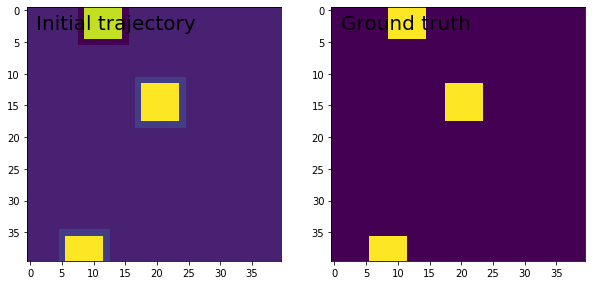

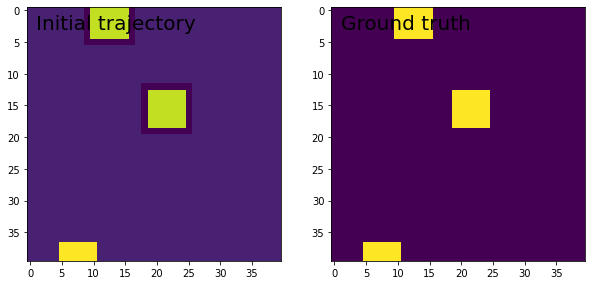

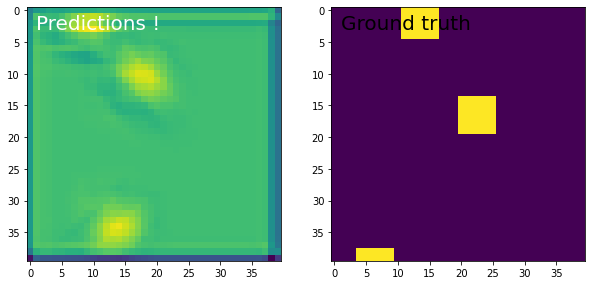

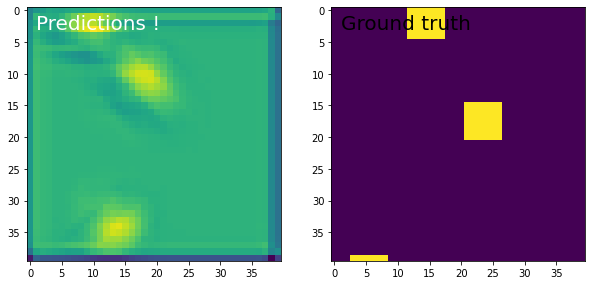

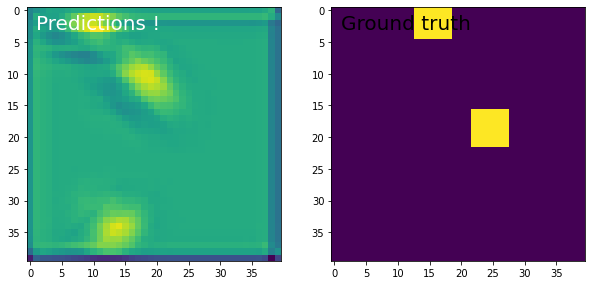

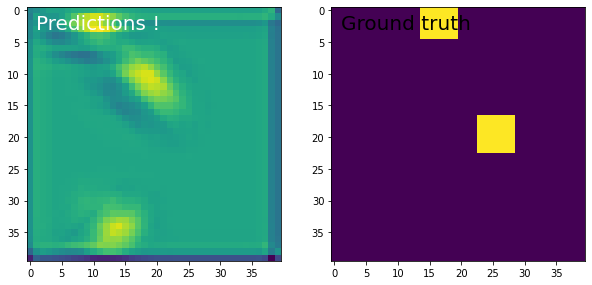

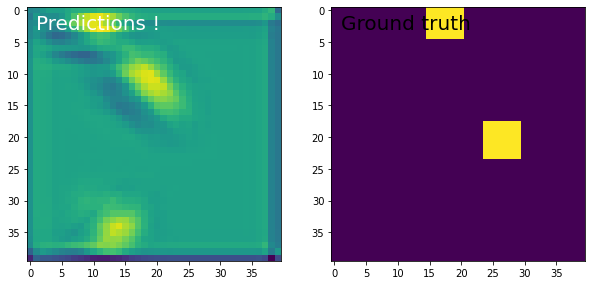

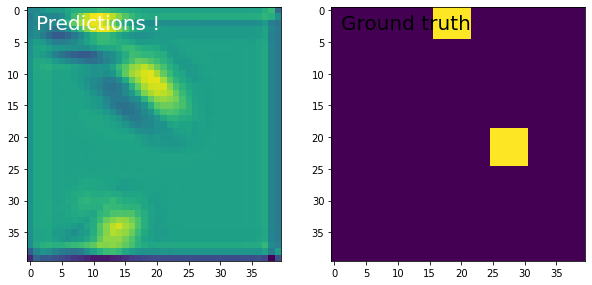

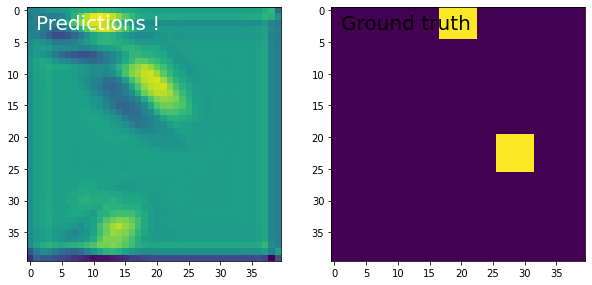

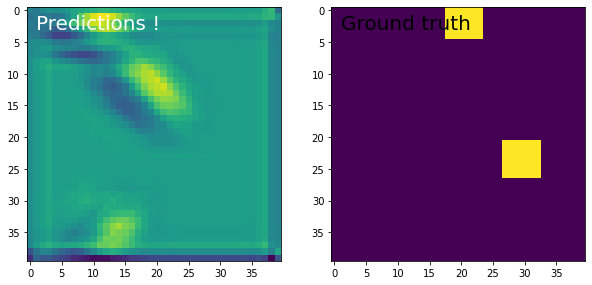

In [8]:
"""
#This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=100,
        epochs=10, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

In [4]:
'''
#Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
**Notes**
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
 
(＃IMDB感情分類タスクでLSTMモデルをトレーニングします。
データセットは実際には小さすぎてLSTMを活用できません
TF-IDF + LogRegなどのより単純ではるかに高速なメソッドと比較して。
**ノート**
-RNNには注意が必要です。バッチサイズの選択は重要です、
損失とオプティマイザの選択は重要です。
一部の構成は収束しません。
-トレーニング中のLSTM損失の減少パターンはかなり異なる可能性があります
CNN / MLP / etcで見たものから。)

'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
# SimpleRNNに変更
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=7,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/7
782/782 [==============================] - 42s 54ms/step - loss: 0.6862 - accuracy: 0.5448 - val_loss: 0.6037 - val_accuracy: 0.6687
Epoch 2/7
782/782 [==============================] - 44s 56ms/step - loss: 0.5562 - accuracy: 0.7115 - val_loss: 0.5027 - val_accuracy: 0.7737
Epoch 3/7
782/782 [==============================] - 44s 56ms/step - loss: 0.4440 - accuracy: 0.8001 - val_loss: 0.4637 - val_accuracy: 0.7956
Epoch 4/7
782/782 [==============================] - 44s 57ms/step - loss: 0.4022 - accuracy: 0.8221 - val_loss: 0.4828 - val_accuracy: 0.7818
Epoch 5/7
782/782 [==============================] - 45s 58ms/step - loss: 0.3315 - accuracy: 0.8612 - val_loss: 0.6917 - val_accuracy: 0.7568
Epoch 6/7
782/782 [==============================] - 44s 56ms/step - loss: 0.3576 - accuracy: 0.8431 - val_loss: 0.488

In [5]:
'''
#Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
**Notes**
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
 
(＃IMDB感情分類タスクでLSTMモデルをトレーニングします。
データセットは実際には小さすぎてLSTMを活用できません
TF-IDF + LogRegなどのより単純ではるかに高速なメソッドと比較して。
**ノート**
-RNNには注意が必要です。バッチサイズの選択は重要です、
損失とオプティマイザの選択は重要です。
一部の構成は収束しません。
-トレーニング中のLSTM損失の減少パターンはかなり異なる可能性があります
CNN / MLP / etcで見たものから。)

'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import GRU
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
# SimpleRNNに変更
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=7,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/7
782/782 [==============================] - 131s 167ms/step - loss: 0.4335 - accuracy: 0.7930 - val_loss: 0.3531 - val_accuracy: 0.8455
Epoch 2/7
782/782 [==============================] - 133s 170ms/step - loss: 0.2421 - accuracy: 0.9025 - val_loss: 0.3564 - val_accuracy: 0.8450
Epoch 3/7
782/782 [==============================] - 132s 169ms/step - loss: 0.1399 - accuracy: 0.9485 - val_loss: 0.5201 - val_accuracy: 0.8294
Epoch 4/7
782/782 [==============================] - 134s 172ms/step - loss: 0.0753 - accuracy: 0.9737 - val_loss: 0.5853 - val_accuracy: 0.8107
Epoch 5/7
782/782 [==============================] - 132s 169ms/step - loss: 0.0415 - accuracy: 0.9868 - val_loss: 0.7409 - val_accuracy: 0.8160
Epoch 6/7
782/782 [==============================] - 135s 172ms/step - loss: 0.0244 - accuracy: 0.9924 - val

## 【問題2】（アドバンス課題）複数のデータセット間での比較
他のデータセットでも実験を行なってください。


データセット - Keras Documentation


Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。

In [23]:
'''
問題2
ロイターニュースワイヤートピックス他クラス分類
LSTM

▼変更箇所
max_features
maxlen
batch_size
reuters.load_data引数のnum_wordsをNone→max_featuresに変更
y --->one-hotエンコーディング
最終層Dense：46、activation：softmax
compile：categorical_crossentropy

'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras.datasets import reuters

from sklearn.preprocessing import OneHotEncoder

max_features = 10000
# cut texts after this number of words (among top max_features most common words)
maxlen = 46
batch_size = 128

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",
                                                         num_words=max_features,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=113,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

# word_index = reuters.get_word_index(path="reuters_word_index.npz")

# one-hotエンコーディング
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train = enc.fit_transform(y_train[:, np.newaxis])
y_test = enc.fit_transform(y_test[:, np.newaxis])

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
x_train shape: (8982, 46)
x_test shape: (2246, 46)
Build model...
Train...
Epoch 1/100
71/71 [==============================] - 11s 150ms/step - loss: 2.6304 - accuracy: 0.3370 - val_loss: 2.3975 - val_accuracy: 0.3620
Epoch 2/100
71/71 [==============================] - 10s 146ms/step - loss: 2.0980 - accuracy: 0.4500 - val_loss: 1.8764 - val_accuracy: 0.4987
Epoch 3/100
71/71 [==============================] - 10s 142ms/step - loss: 1.7291 - accuracy: 0.5443 - val_loss: 1.7496 - val_accuracy: 0.5508
Epoch 4/100
71/71 [==============================] - 10s 140ms/step - loss: 1.5982 - accuracy: 0.5758 - val_loss: 1.6950 - val_accuracy: 0.5574
Epoch 5/100
71/71 [==============================] - 10s 141ms/step - loss: 1.4002 - accuracy: 0.6338 - val_loss: 1.6090 - val_accuracy: 0.5988
Epoch 6/100
71/71 [==============================] - 10s 141ms/step - loss: 1.1924 - accuracy: 0.6887 - val_loss: 1.4

In [24]:
'''
問題2
ロイターニュースワイヤートピックス分類
SimpleRNN
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN
from keras.datasets import imdb
from keras.datasets import reuters

from sklearn.preprocessing import OneHotEncoder

max_features = 10000
# cut texts after this number of words (among top max_features most common words)
maxlen = 46
batch_size = 128

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",
                                                         num_words=max_features,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=113,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

word_index = reuters.get_word_index(path="reuters_word_index.npz")

# one-hotエンコーディング
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train = enc.fit_transform(y_train[:, np.newaxis])
y_test = enc.fit_transform(y_test[:, np.newaxis])

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
# SimpleRNNに変更
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=30,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
x_train shape: (8982, 46)
x_test shape: (2246, 46)
Build model...
Train...
Epoch 1/30
71/71 [==============================] - 4s 55ms/step - loss: 2.8262 - accuracy: 0.2699 - val_loss: 2.4216 - val_accuracy: 0.3620
Epoch 2/30
71/71 [==============================] - 4s 52ms/step - loss: 2.4370 - accuracy: 0.3396 - val_loss: 2.4175 - val_accuracy: 0.3620
Epoch 3/30
71/71 [==============================] - 4s 52ms/step - loss: 2.4322 - accuracy: 0.3468 - val_loss: 2.4196 - val_accuracy: 0.3620
Epoch 4/30
71/71 [==============================] - 4s 53ms/step - loss: 2.4217 - accuracy: 0.3495 - val_loss: 2.3873 - val_accuracy: 0.3620
Epoch 5/30
71/71 [==============================] - 4s 53ms/step - loss: 2.3502 - accuracy: 0.3765 - val_loss: 2.2632 - val_accuracy: 0.4052
Epoch 6/30
71/71 [==============================] - 4s 53ms/step - loss: 2.2222 - accuracy: 0.4251 - val_loss: 2.2441 - val_accuracy

In [25]:
'''
問題2
ロイターニュースワイヤートピックス分類
GRU
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import GRU
from keras.datasets import imdb
from keras.datasets import reuters

from sklearn.preprocessing import OneHotEncoder

max_features = 10000
# cut texts after this number of words (among top max_features most common words)
maxlen = 46
batch_size = 128

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",
                                                         num_words=max_features,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=113,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

# word_index = reuters.get_word_index(path="reuters_word_index.npz")

# one-hotエンコーディング
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train = enc.fit_transform(y_train[:, np.newaxis])
y_test = enc.fit_transform(y_test[:, np.newaxis])

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
# GRUに変更
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=30,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
x_train shape: (8982, 46)
x_test shape: (2246, 46)
Build model...
Train...
Epoch 1/30
71/71 [==============================] - 9s 127ms/step - loss: 2.5478 - accuracy: 0.3579 - val_loss: 1.9759 - val_accuracy: 0.4412
Epoch 2/30
71/71 [==============================] - 9s 121ms/step - loss: 1.8628 - accuracy: 0.4742 - val_loss: 1.8322 - val_accuracy: 0.5156
Epoch 3/30
71/71 [==============================] - 9s 120ms/step - loss: 1.6704 - accuracy: 0.5478 - val_loss: 1.8046 - val_accuracy: 0.5312
Epoch 4/30
71/71 [==============================] - 9s 121ms/step - loss: 1.5431 - accuracy: 0.5857 - val_loss: 1.7790 - val_accuracy: 0.5450
Epoch 5/30
71/71 [==============================] - 9s 121ms/step - loss: 1.4365 - accuracy: 0.6146 - val_loss: 1.7724 - val_accuracy: 0.5574
Epoch 6/30
71/71 [==============================] - 9s 123ms/step - loss: 1.3343 - accuracy: 0.6461 - val_loss: 1.8187 - val_ac

## 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。


- RNN
- SimpleRNNCell
- GRUCell
- LSTMCell
- StackedRNNCells
- CuDNNGRU
- CuDNNLSTM

### 回答
- RNN
> LSTMと比べ、長期時系列を保持できない弱点がある。

- SimpleRNNCell
- GRUCell
- LSTMCell
- StackedRNNCells
> cellがつくものは全般的に、複数のcellを束ねたモデルではなく、一個一個のcellから独立して出力させるやり方。ようやくすると１文字単位対単語単位（単語単位対文章単位）という違い。

- CuDNNGRU
- CuDNNLSTM
> GPU演算限定のモデル。高速処理が実現できる。